In [1]:
import numpy as np
#from geneticalgorithm import geneticalgorithm as ga
import random
from graph import Graph
import  matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPoint
from polygons import Polygons
from energy import Energy
from search import MC
from scipy.special import binom 
from search import Encode

In [2]:
import networkx as nx

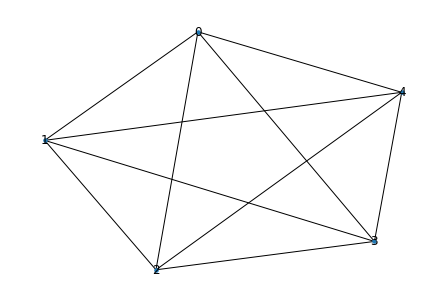

In [3]:
graph = Graph.fully(5)
polygon_object = Polygons(graph)
G = nx.from_numpy_matrix(graph.adj_matrix)
nx.draw(G, with_labels=True, node_size=12)

In [4]:
polygon_object = Polygons(graph)
mc = MC(polygon_object)

In [5]:
energy = []
delta = []
temperatures = []

In [6]:
%%time
for i in range(1000):
    temperature = 36 - i / 63
    delta_energy = mc.apply('contract', 100, temperature=temperature)
    energy.append(Energy(mc.polygon)(mc.polygon))
    delta.append(delta_energy)
    temperatures.append(temperature)


CPU times: user 1.97 s, sys: 2.48 ms, total: 1.97 s
Wall time: 1.97 s


In [7]:
probabilities = np.exp(- delta_energy / temperatures)
probabilities[probabilities >=1] = 1

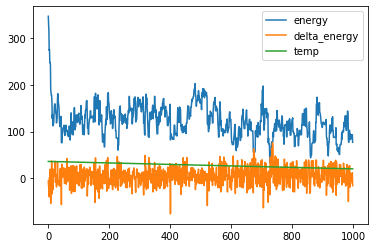

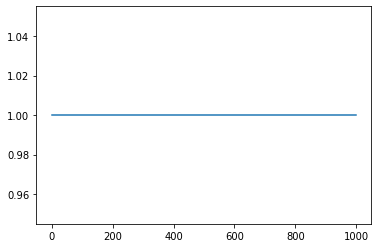

In [8]:
plt.plot(energy, label='energy')
plt.plot(delta, label='delta_energy')
plt.plot(temperatures, label='temp')
plt.legend()
plt.show()
plt.plot(probabilities, label='acceptance probability')


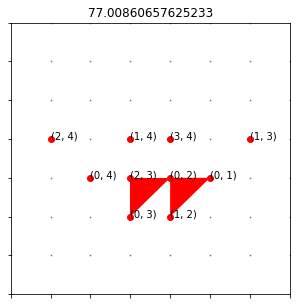

6


In [9]:
mc.polygon.move_center_to_middle()
fig,ax=plt.subplots(ncols=1, figsize=(5,5))
mc.polygon.visualize(ax, mc.polygon.get_all_polygon_coords())
fit = Energy(mc.polygon)
ax.set_title(str(fit(mc.polygon)))
plt.show()
print(graph.num_constrains())

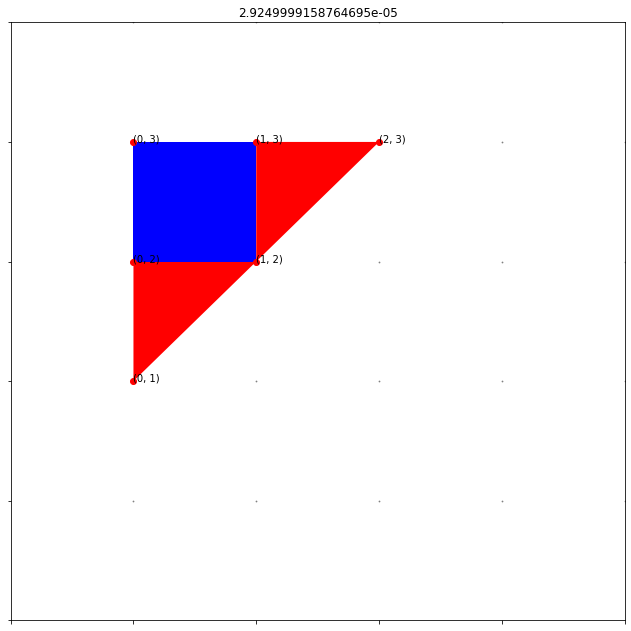

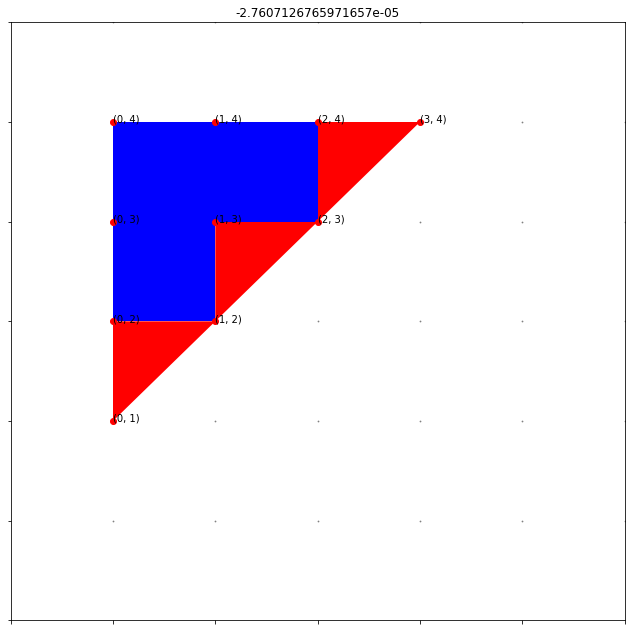

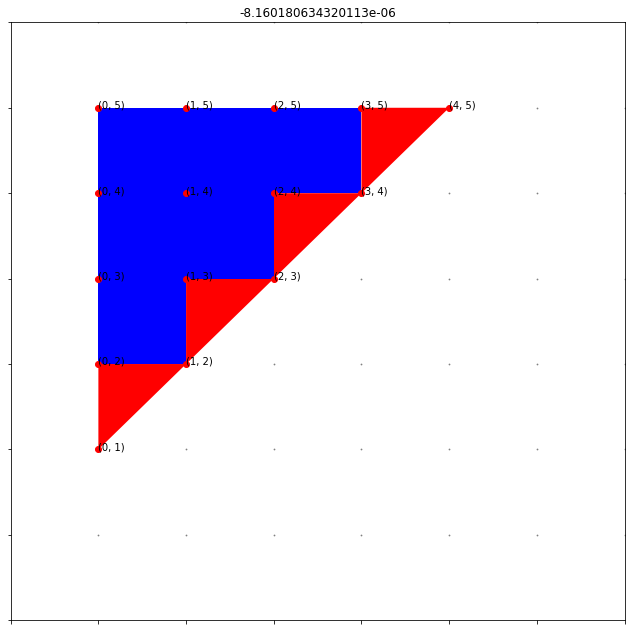

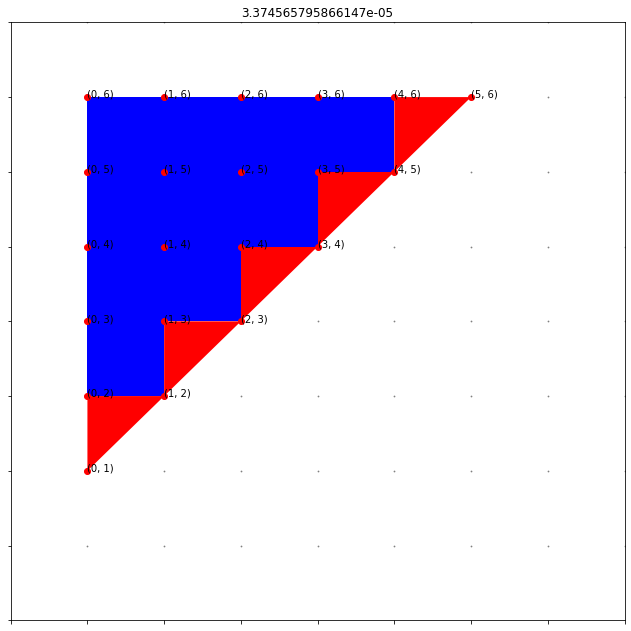

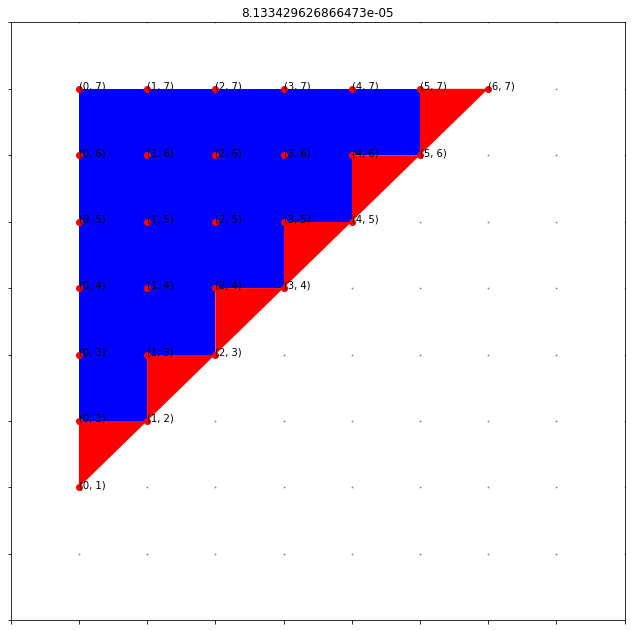

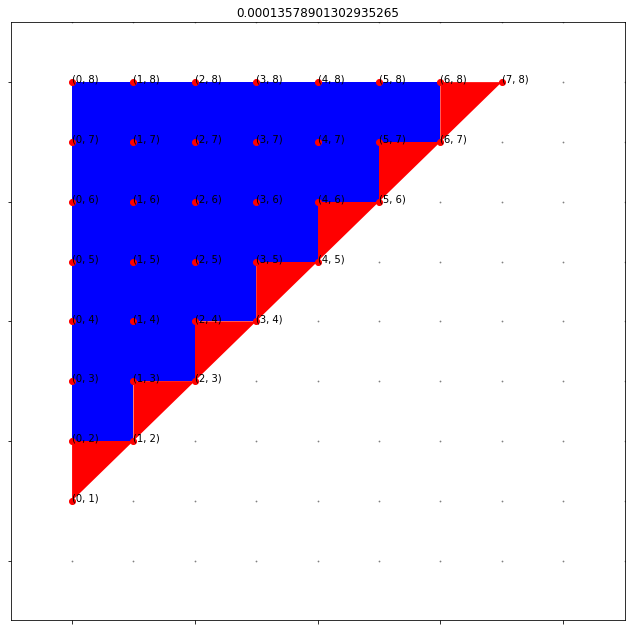

In [11]:
for N in range(4, 10):
    graph = Graph.fully(N)

    polygon_object = Polygons(graph)
    fig,ax=plt.subplots(ncols=1, figsize=(11,11))
    lhz_coords = qbits = polygon_object.qbits 
    polygon_object.update_qbits_coords(qbits, lhz_coords)
    polygon_object.visualize(ax, polygon_object.get_all_polygon_coords())
    
    plt.title(str(Energy(polygon_object)(polygon_object)))

In [ ]:
[sum(i) for i in fits]

In [ ]:
f.sum(axis=-1)

In [ ]:
real4(4)

In [ ]:
real3(4)

In [ ]:
y3[0] + y[0]

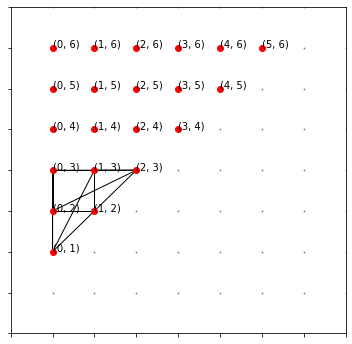

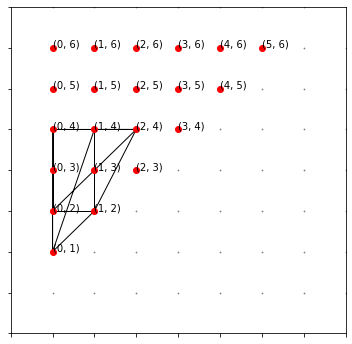

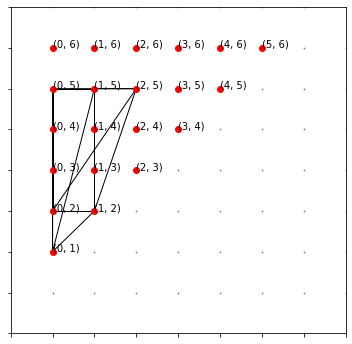

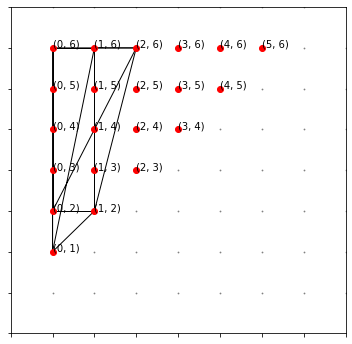

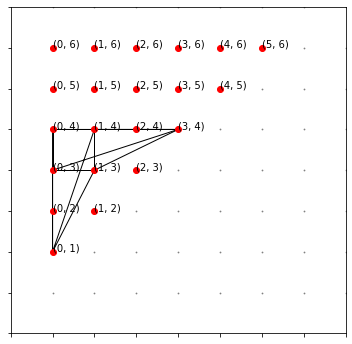

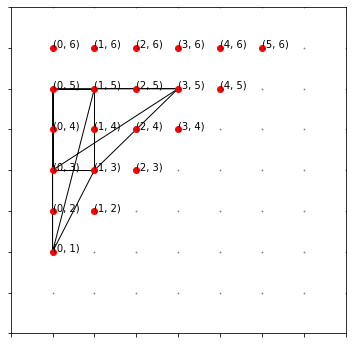

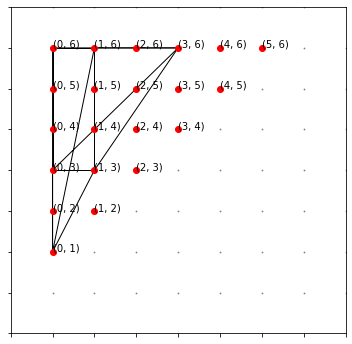

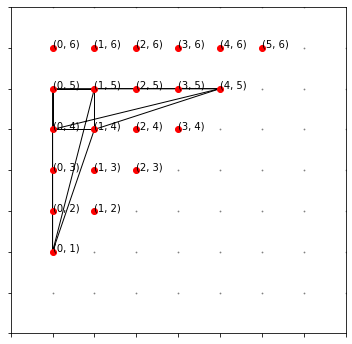

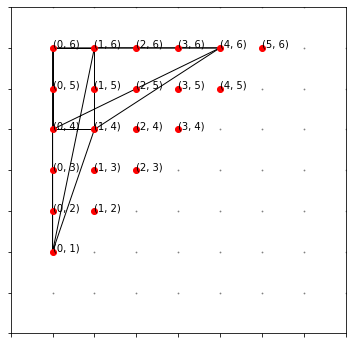

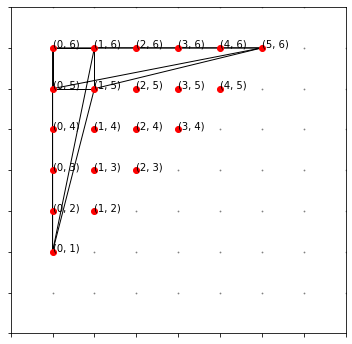

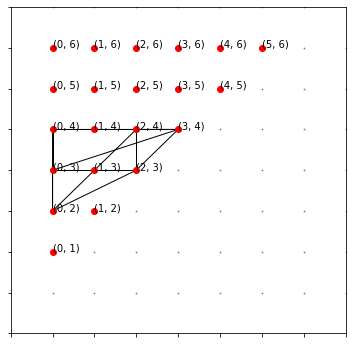

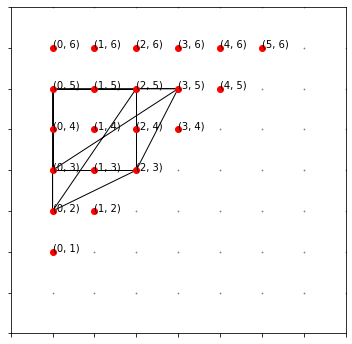

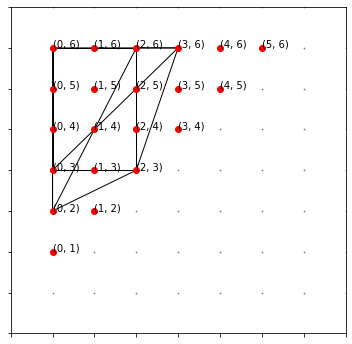

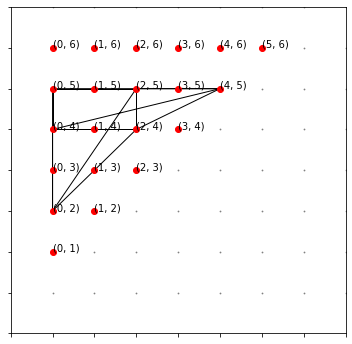

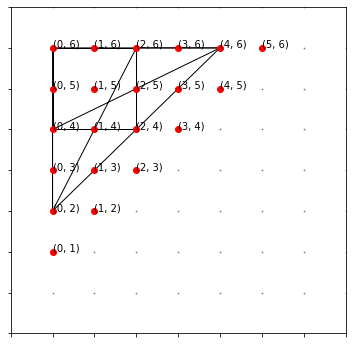

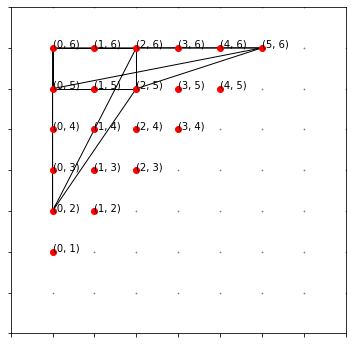

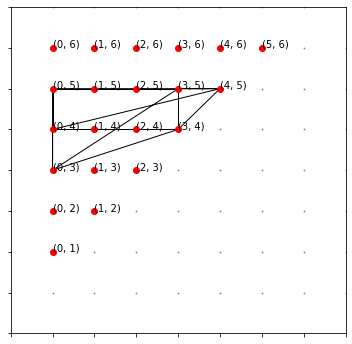

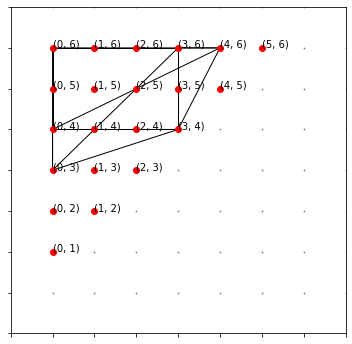

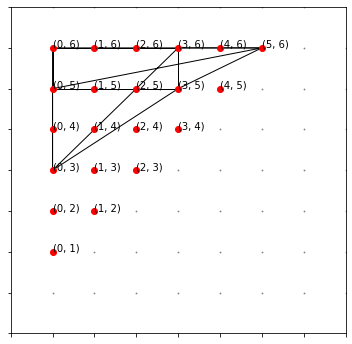

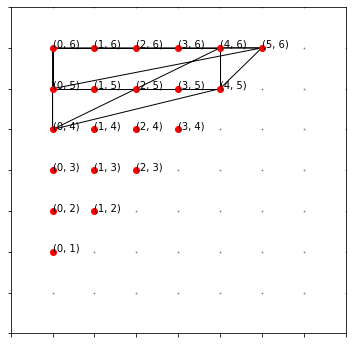

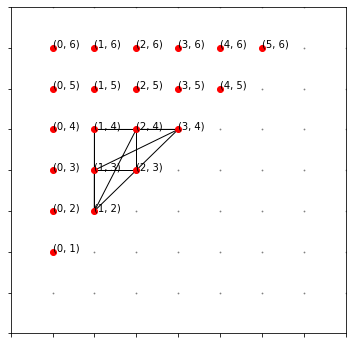

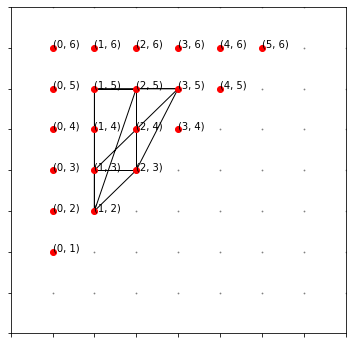

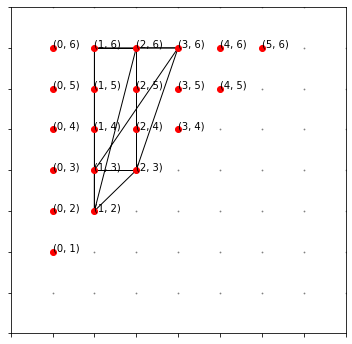

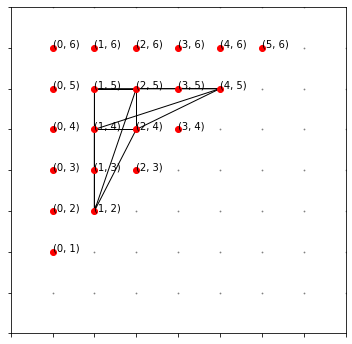

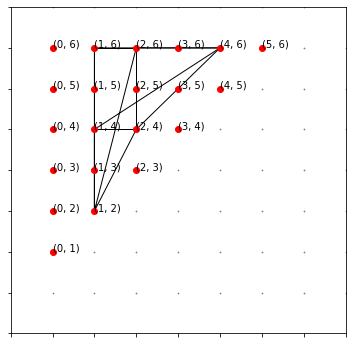

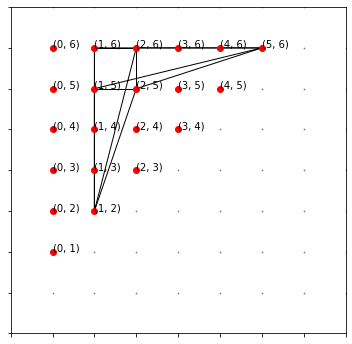

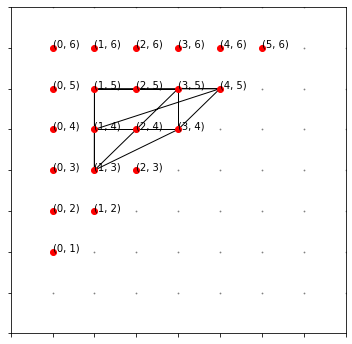

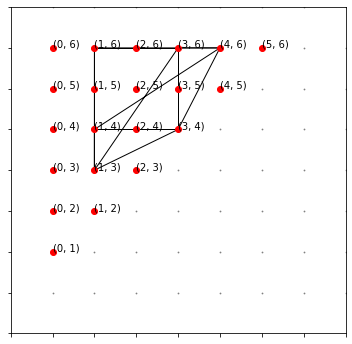

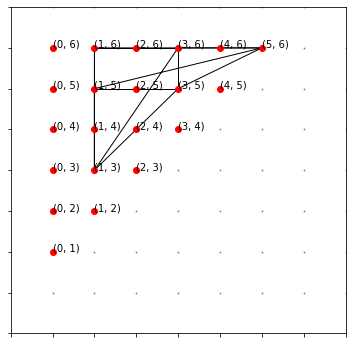

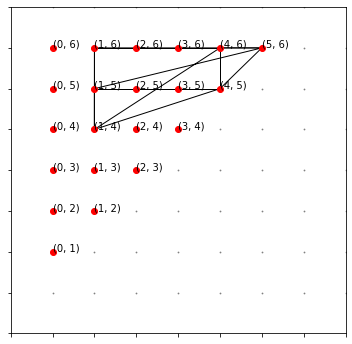

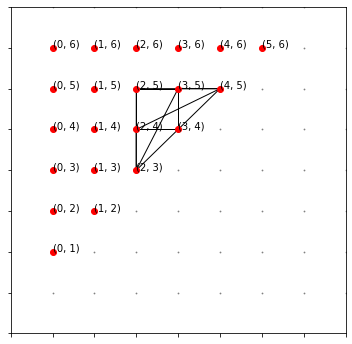

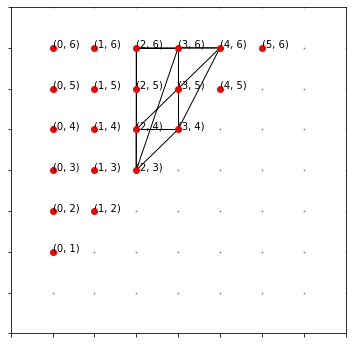

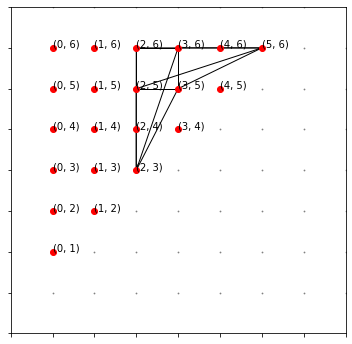

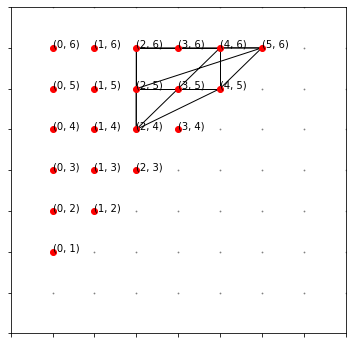

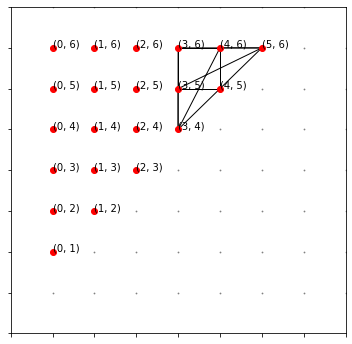

In [16]:
N = 7
li = polygonss(N)

for polygon in [li[i:i+3] for i in range(0, len(li), 3)]:
    graph = Graph.fully(N)
    polygon_object = Polygons(graph)
    lhz_coords = qbits = polygon_object.qbits 
    polygon_object.update_qbits_coords(qbits, lhz_coords)
    fig,ax=plt.subplots(ncols=1, figsize=(6, 6))

    x, y = np.meshgrid(np.arange(polygon_object.K), np.arange(polygon_object.K))
    ax.scatter(x.flatten(), y.flatten(), color='grey', s=0.6)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    for qbit, coord in polygon_object.qbit_coord_dict.items():
        ax.annotate(str(qbit), coord)
        ax.scatter(*coord, color='red')

    x_range = sorted(polygon_object.convex_hull(), key=lambda x: x[0])
    y_range = sorted(polygon_object.convex_hull(), key=lambda y: y[1])
    ax.set_xlim(min(x_range[0][0], y_range[0][1])-1,
             max(x_range[-1][0], y_range[-1][1])+1)
    ax.set_ylim(min(x_range[0][0], y_range[0][1])-1,
             max(x_range[-1][0], y_range[-1][1])+1)
    fill, facecolor = False, None
    for p in polygon:
        patch = plt.Polygon(p,
                zorder=0,
                fill=fill,
                lw=1,
                facecolor = facecolor)
        ax.add_patch(patch)
    plt.show()




In [ ]:
def scope_of_shapes(x, y, n):
    n = n-2
    square = 2 * x + 2 * y
    triangular = (
      n - (y - 1)
    + n - (x - 1)
    + np.sqrt(y ** 2 + (n - (y - 1) - x) ** 2)
    + np.sqrt(x ** 2 + (n - (x - 1) - y) ** 2))
    cross = (
      n - (y - 1) - x
    + n - (x - 1) - y
    + np.sqrt(y ** 2 + (n - (y - 1)) ** 2)
    + np.sqrt(x ** 2 + (n - (x - 1)) ** 2))
    return sum([triangular, square, cross]) - 3 * 4


In [ ]:
def total_energy_LHZ4(N_):
    summe = 0
    for N in range(4,N_ + 1):
        summe += (sum(map(lambda x: scope_of_shapes(*x),
                          [(i, j, n) for n in range (4, N + 1)
                           for i in range(1, n) for j in range(1, n)
                           if i + j <= n - 2])))
    return summe

In [ ]:
x = np.array([i for i in range(4,20)])
y = [total_energy_LHZ4(n) for n in x]

In [ ]:
p5 = np.poly1d([ 0.15096845, -1.286267  ,  3.9329116 , -5.02683055,  2.16089994,
        0.07256708])#np.poly1d(np.polyfit(np.array(x), y, 5))

In [ ]:
def real3(N):
    C = N - 2
    return int(C)
def real4(N):
    C = (N / 2 * (N - 1) - N + 1) - real3(N)
    return int(C)

In [ ]:
f4 = p5(x) / list(map(real4, x))

In [ ]:
_ = plt.plot(x, y, '.', x, p5(x), '--')
plt.plot(x, f4 * list(map(real4, x)),'r', alpha=0.5)
plt.show()

In [ ]:
f4

In [15]:
def non_cyclic_permutation(liste):
    liste.insert(1, liste[-1])
    liste.pop(-1)
    return liste
def order_cylic_permutation(liste):
    return (liste[liste.index(min(liste, key=lambda x: (x[0], x[1]))):]
     + liste[:liste.index(min(liste, key=lambda x: (x[0], x[1])))])
#def area():
import itertools
def polygonss(N):
    polys = []
    for l in itertools.combinations([i for i in range(0, N)], 4):
        liste = list(l)
        polys.append(order_cylic_permutation(
            Polygons.get_polygon_from_cycle(liste)))
        liste = non_cyclic_permutation(liste)
        polys.append(order_cylic_permutation(
            Polygons.get_polygon_from_cycle(liste)))        
        liste = non_cyclic_permutation(liste)
        polys.append(order_cylic_permutation(
            Polygons.get_polygon_from_cycle(liste)))        
    return polys#sorted(polys, key=lambda x: (x[0], x[1]))
        

In [ ]:
def polygons3(N):
    polys = []
    for l in itertools.combinations([i for i in range(0, N)], 3):
         polys.append(Polygons.is_unit_triangle(
             Polygons.get_polygon_from_cycle(list(l))))
    return polys

In [ ]:
y3 = [sum(polygons3(n)) for n in x]

In [ ]:
p4 = np.poly1d(np.polyfit(np.array(x), y3, 4))

In [ ]:
f3 = p4(x) / list(map(real3, x))

In [ ]:


_ = plt.plot(x, y3, '.', x, p4(x), '--', x, (f3* list(map(real3, x))),'+')
plt.plot(x, list(map(real3, x)))
plt.show()

In [ ]:
y3

In [ ]:
f3